<a href="https://colab.research.google.com/github/davidjie1949/learnPytorch/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for all neural networks
import matplotlib.pyplot as plt

# Check pytorh version
torch.__version__

'2.3.0+cu121'

## 1. Data (prep and loading)
Data can be almost anything ... in machine learning.
* Excel spreadsheet
* Image of any kind
* Videos (Youtube has lots of data ...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numberical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use  a linear regression formula to make a stright line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [4]:
# Create a train/tst split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize our data?
This is where the data explorer's motto comes in!

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #Are there predicitons?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  #show the legend
  plt.legend(prop={"size": 14});

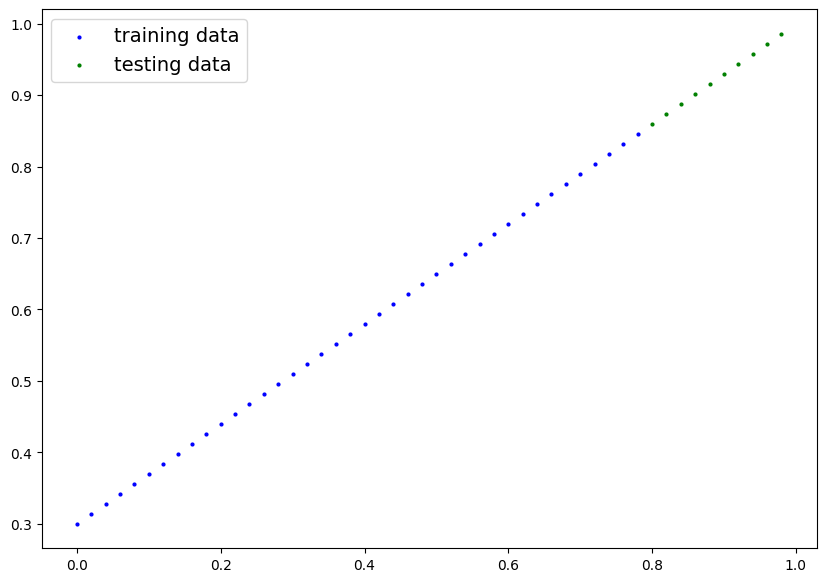

In [6]:
plot_predictions();

##2. Build model
Our first Pytorch model!

This is very exciting... let's do it!

Through two main algo:

1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [60]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everthing in Pytorch inherhits from nn.Module
  def __init__(self):
    # initialize model parameters to be used in various computations
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs
* torch.nn.Paramters
* torch.nn.Module
* def forward()

### Checking the contents of our PyTorch model
nOw we've created a model, let's see what's inside ...

So we can check out model parameters or what's inside our model using .parameters().

In [8]:
# create random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using 'torch.inference_mode()'
To checkout model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'

When we pass data through our model, it's going to run it through the forard() method.


In [10]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

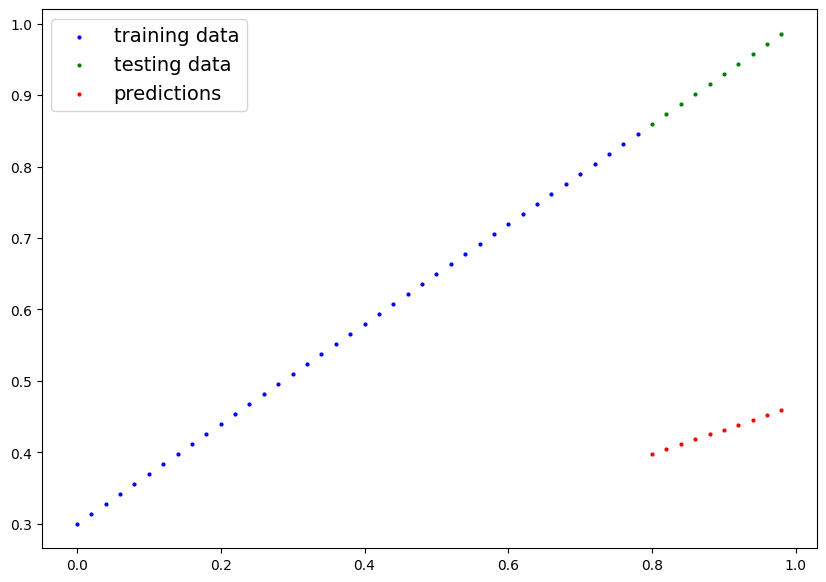

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## 3. Train model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameter.

Or in other words from a poor representation of the data to be a good representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different area. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **LOSS function** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias) to impove the loss function.

And specifically for Pytorch, we need:
* A traning loop
* A testing loop

In [14]:
# checkout  our model's parameters (a parameter is avavlue that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) #lr = learning rate = possibly the most important hyperparameter you can set


**Q:** Which loss function and optimizer should I use?
**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem(like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss(binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. loop through the data
1. forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
    5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [16]:

# An epoch is one loop through the data ... (this is a hyperparameter as we've set it )
epochs = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
# 0. Loop throught the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch, thread is set all parameters that require gradients to require gradient

  #1. Forward pass on training data using the forward() method inside
  y_pred = model_0(X_train)

  #2. Calculates pass (how different are the model's predicions to the true values)
  loss = loss_fn(y_pred, y_train)

  #3. Clear the gradients of the optimizer before backpropagation (they accumulate by default)
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Update parameters (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing(dropout batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenses
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calcuate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    #Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

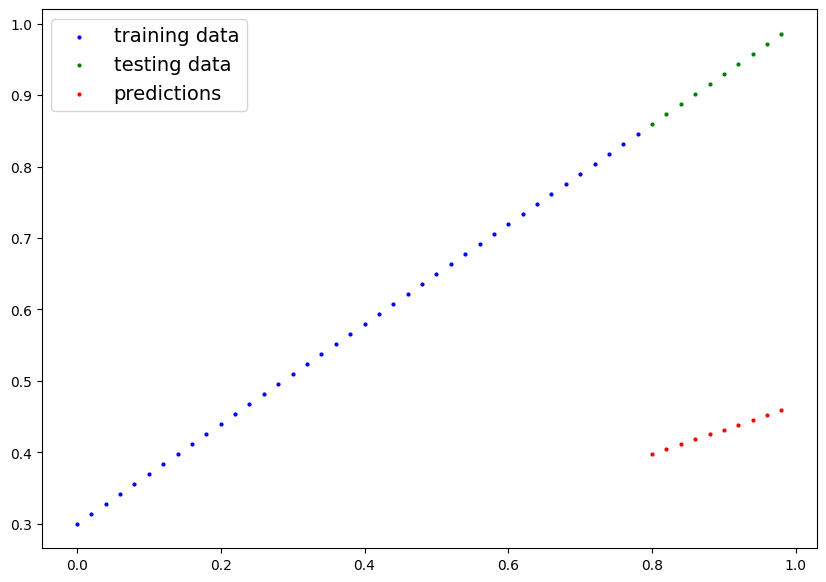

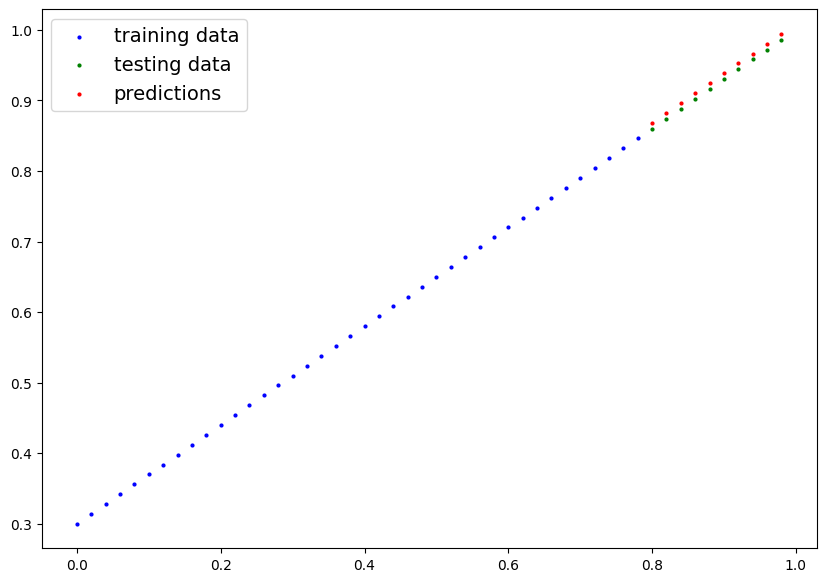

In [17]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds);
plot_predictions(predictions=y_preds_new);

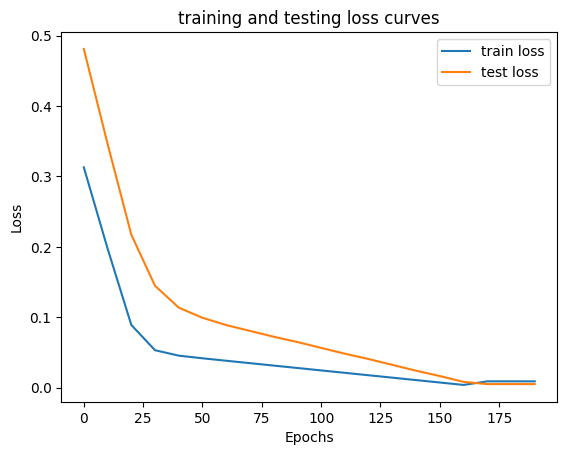

In [18]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## saving a model in PyTorch

There are three main methods you should about for saving and loading models in Pytorch.

1. 'torch.save()' - allows you sae a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you load a save Pytorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary

In [19]:
# Saving our PyTorch model
from pathlib import Path

#1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [20]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jun  2 07:11 01_pytorch_workflow_model_0.pth


## Loading a pytorch model
since we saved our model's 'state_dict()' rather than the entire modle, we'll create a new instance of our model class and load the saved 'state_dict()' into that.


In [21]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [23]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [24]:
# make some mdels preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [25]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through the steps above and see it all in one place.

In [35]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.3.0+cu121'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the coe will default ot using CPU.

In [36]:
# Setup device agnositc code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [37]:
!nvidia-smi

Sun Jun  2 07:18:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              29W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data

In [41]:
# Create some data using the linear regression formula of y = weight * X +
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y(features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
X[:10], y[:10]

# Split data
train_split = int (0.8*len(X))
X_train, y_train = X[:train_split], y [:train_split]
X_test, y_test = X[train_split:], y [train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

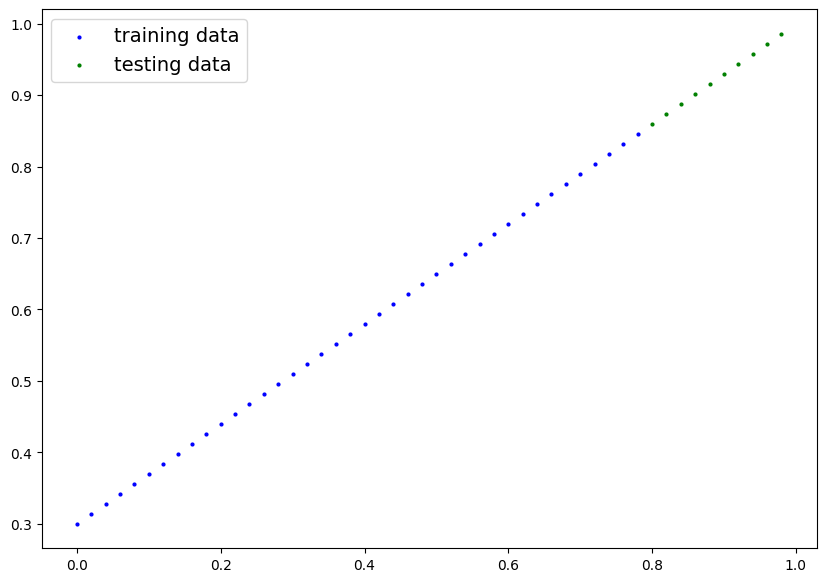

In [42]:
# Plot the data
# note: if you don't have the plot_predictions() fnc loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 build a pytorch linear model

In [43]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the modle parameters
    self.linear_layer = nn.Linear(in_features= 1, out_features= 1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set te manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [46]:
#Move the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 training
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [47]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

#setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [49]:
# Let's write a training loop
torch.manual_seed(42)
epochs = 200

#Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backprogagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5436570048332214 | Test loss: 0.560505211353302
Epoch: 10 | Loss: 0.42844706773757935 | Test loss: 0.42579540610313416
Epoch: 20 | Loss: 0.31323719024658203 | Test loss: 0.2910855710506439
Epoch: 30 | Loss: 0.1980273425579071 | Test loss: 0.15637575089931488
Epoch: 40 | Loss: 0.0828174576163292 | Test loss: 0.021665919572114944
Epoch: 50 | Loss: 0.023356428369879723 | Test loss: 0.04883447289466858
Epoch: 60 | Loss: 0.019609849900007248 | Test loss: 0.04538799077272415
Epoch: 70 | Loss: 0.01618141122162342 | Test loss: 0.03711546212434769
Epoch: 80 | Loss: 0.012742983177304268 | Test loss: 0.028842901811003685
Epoch: 90 | Loss: 0.00930792186409235 | Test loss: 0.02125724032521248
Epoch: 100 | Loss: 0.005878167692571878 | Test loss: 0.012984705157577991
Epoch: 110 | Loss: 0.0024393596686422825 | Test loss: 0.004712170455604792
Epoch: 120 | Loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 130 | Loss: 0.010256479494273663 | Test loss: 0.000330817711

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [51]:
# Turn odel into evaluation mode
model_1.eval()

#Make predicitons on th test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]], device='cuda:0')

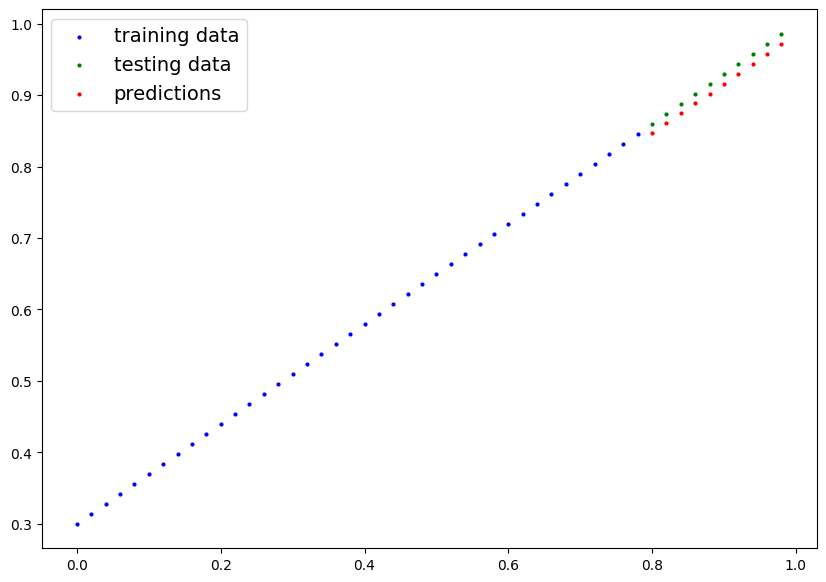

In [53]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [71]:
# Saving our PyTorch model
from pathlib import Path

#1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [76]:
# Load a pytorch

# create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [78]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [81]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [83]:
# devaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')